In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing

In [2]:
df=pd.read_csv('All_attributes_drought.csv', index_col=None)

In [3]:
# The column 'catch_area' is problematic, because it was a object type.
# Changed to 'int'
df['catch_area'] =df['catch_area'].str.replace('.','')
df['catch_area'] =df['catch_area'].astype('int64')
df['catch_area'] =df['catch_area']/1000

In [4]:
# Label encoding function for non-numerical data
def label_enconding(df, variable):
    le = preprocessing.LabelEncoder()
    df[f'le_{variable}'] = le.fit_transform(df[f'{variable}'])
    for i, c in zip(le.fit_transform(le.classes_), le.classes_):
#     print(le.fit_transform(le.classes_), le.classes_)
        print(i, c)

In [5]:
label_enconding(df, variable='gauge_biome')
label_enconding(df, variable='trend-deficit')
label_enconding(df, variable='trend-duration')
label_enconding(df, variable='trend-intensity')

0 Amazon
1 Atlanticforest
2 Caatinga
3 Cerrado
4 Pampa
5 Pantanal
0 decreasing
1 increasing
2 no trend
0 decreasing
1 increasing
2 no trend
0 decreasing
1 increasing
2 no trend


In [6]:
df.columns

Index(['duration-drought', 'deficit-drought', 'intensity-drought',
       'Number of events-drought', 'id', 'trend-deficit', 'trend-duration',
       'trend-intensity', 'ANA ID', 'longitude_centroid',
       ...
       'elev_mean', 'elev_min', 'elev_max', 'elev_gauge', 'catch_slope',
       'catch_order', 'le_gauge_biome', 'le_trend-deficit',
       'le_trend-duration', 'le_trend-intensity'],
      dtype='object', length=101)

In [7]:
# List of relevant variables (PCA analysis)
variables = ['duration-drought', 'deficit-drought', 'intensity-drought','Number of events-drought',
            'dist_coast', 'aridity_index',
            'p_seasonality', 'catch_hand', 
            'dist_urban', 'hdisturb_index',
            'q_elasticity', 'catch_area', 
            'elev_mean', 'catch_slope',
            'le_gauge_biome',
            ]

In [8]:
df_var=df[variables]

In [9]:
corr=df_var.corr(method='spearman')

In [10]:
df_heat=corr[['duration-drought', 'deficit-drought', 'intensity-drought','Number of events-drought']]

In [11]:
label_x=['Drought duration','Drought deficit','Drought intensity','Number of drought events']
label_y=['Distance to coast', 'Aridity index', 'Prec seasonality','Catch HAND','Distance to urban','Hydrologic disturb index','Q elasticity','Catch area','Mean elevation', 'Mean slope', 'Biome']

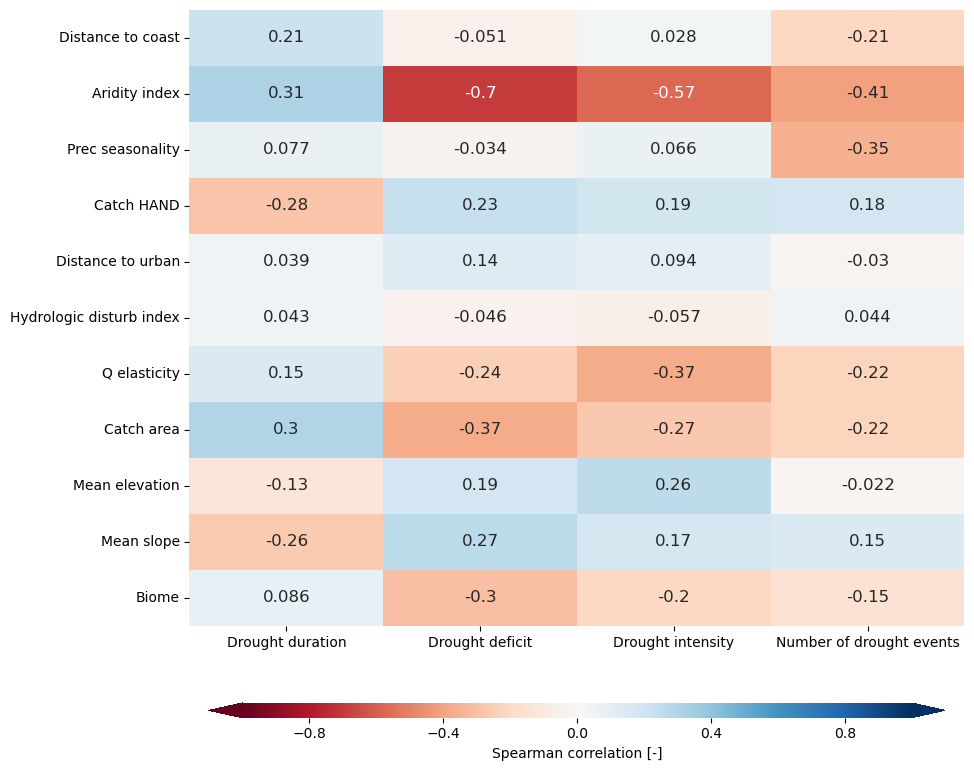

In [12]:
# plot a heatmap with annotation
fig, ax1 = plt.subplots(figsize = (10,10))
ax=sns.heatmap(df_heat.iloc[4:,:], annot=True, annot_kws={"size": 12},cmap='RdBu', vmin=-1, vmax=1,
            cbar_kws = dict(shrink = 0.95, pad = 0.10, fraction = 0.10, aspect = 50, 
                           orientation = 'horizontal', extend = 'both', ticks = [-0.8,-0.4,0,0.4,0.8]),
              xticklabels=label_x, yticklabels=label_y,
              )
ax.collections[0].colorbar.set_label("Spearman correlation [-]")

plt.savefig('Drought_SpearmansCorr.png', format = "png", dpi = 400)